In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/Groceries_dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.shape

(38765, 3)

Data gồm 38765 dòng thể hiện các order của một cửa hàng tạp hóa.

Gồm 3 cột:

 + Member_number : mã khách hàng
 + Date : ngày mua hàng
 + itemDescription: tên món hàng, mỗi dòng chỉ gồm 1 món hàng duy nhất

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Data explore

## Plot the purchase overtime

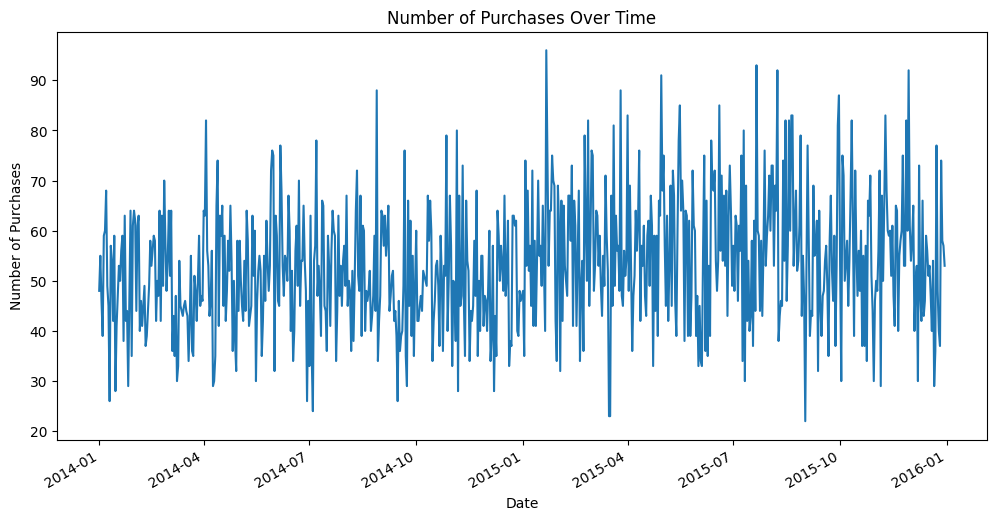

In [6]:
plot_df = df.copy()
plot_df['Date'] = pd.to_datetime(plot_df['Date'], format='%d-%m-%Y')


plt.figure(figsize=(12, 6))
plot_df['Date'].value_counts().sort_index().plot()
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()

## Plot top 10 items bought

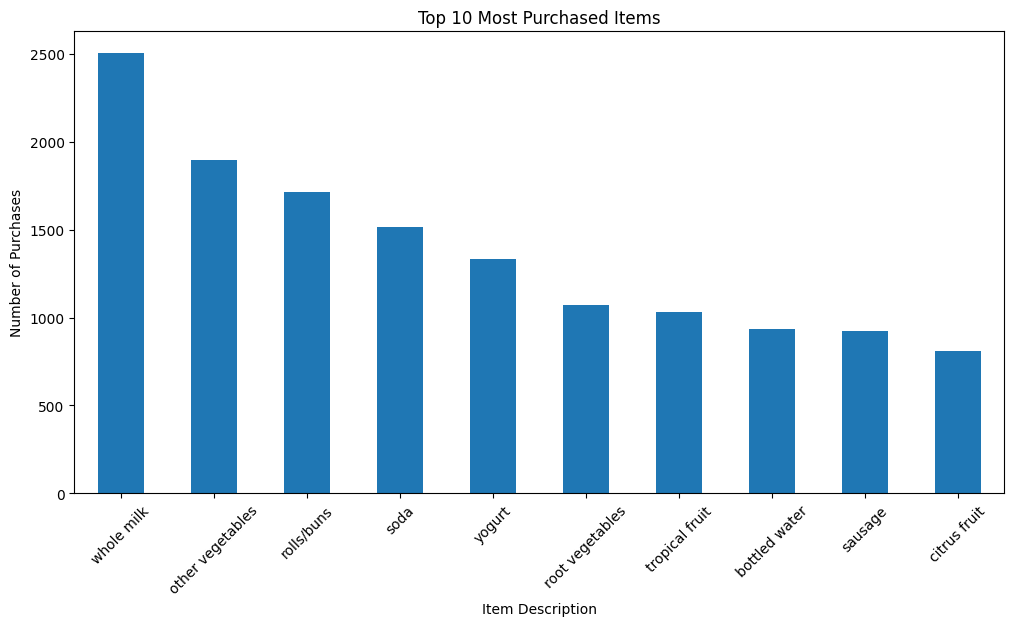

In [7]:
plt.figure(figsize=(12, 6))
df['itemDescription'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Item Description')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

Xem các missing value và xử lý nếu có

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Member_number,0
Date,0
itemDescription,0


Vì 1 ngày có thể mua nhiều hơn 1 sản phẩm, và 1 sản phẩm có thể được mua nhiều lần, vì thế ta sẽ loại bỏ các sản phẩm bị trùng

In [9]:
groceries_apriori = df.copy().drop_duplicates()
groceries_apriori = groceries_apriori.set_index(["Member_number", "Date"])

groceries_apriori.index = groceries_apriori.index.get_level_values("Member_number").astype(str) + "_" + groceries_apriori.index.get_level_values("Date").astype(str)
groceries_apriori.index.names = ["Index"]

In [ ]:
groceries_apriori

,itemDescription
Index,
1808_21-07-2015,tropical fruit
2552_05-01-2015,whole milk
2300_19-09-2015,pip fruit
1187_12-12-2015,other vegetables
3037_01-02-2015,whole milk
...,...
4471_08-10-2014,sliced cheese
2022_23-02-2014,candy
1097_16-04-2014,cake bar


In [10]:
# Kiểm tra xem có bao nhiêu hóa đơn
unique_values = groceries_apriori.index.unique()

In [11]:
unique_values.shape

(14963,)

In [22]:
test = groceries_apriori.groupby('Index')

In [21]:
test.head()

,itemDescription
Index,
1808_21-07-2015,tropical fruit
2552_05-01-2015,whole milk
2300_19-09-2015,pip fruit
1187_12-12-2015,other vegetables
3037_01-02-2015,whole milk
...,...
4471_08-10-2014,sliced cheese
2022_23-02-2014,candy
1097_16-04-2014,cake bar


## Create bitmap

In [12]:
df_one_hot = pd.get_dummies(groceries_apriori['itemDescription'])

In [16]:
df_one_hot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Index,,,,,,,,,,,,,,,,,,,,,
1808_21-07-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2552_05-01-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2300_19-09-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1187_12-12-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3037_01-02-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471_08-10-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022_23-02-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1097_16-04-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
basket = df_one_hot.groupby('Index').max().reset_index()

In [15]:
basket

,Index,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000_15-03-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,1000_24-06-2014,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1000_24-07-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1000_25-11-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1000_27-05-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999_24-01-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14959,4999_26-12-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,5000_09-03-2014,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,5000_10-02-2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
basket.drop('Index', inplace=True, axis=1)

In [18]:
basket.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


# Apriori

## Frequent item set

Lấy ra các itemset có support lớn hơn min_support bằng cách sử dụng thuật toán priori

min_support = 0.001 = 1/1000

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(rolls/buns, sausage, whole milk)"
746,0.001002,"(rolls/buns, soda, whole milk)"
747,0.001337,"(rolls/buns, yogurt, whole milk)"
748,0.001069,"(soda, sausage, whole milk)"


Từ frequent itemset lấy ra các items set có lift >= 1

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
rules = rules = rules.sort_values(['lift','support'],ascending=False)\
  .reset_index(drop=True)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219,0.548014
1,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,7.967480e-04,1.013532,0.576701
2,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681,0.481231
3,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307,0.521727
4,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,5.548137e-04,1.038081,0.401735
...,...,...,...,...,...,...,...,...,...,...
235,(grapes),(soda),0.014436,0.097106,0.001403,0.097222,1.001195,1.674919e-06,1.000129,0.001211
236,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369
237,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
238,(rolls/buns),(fruit/vegetable juice),0.110005,0.034017,0.003743,0.034022,1.000136,5.091755e-07,1.000005,0.000153


## Frequent bought together

In [ ]:
def frequently_bought_together(item):

  frequent_itemsets = apriori(basket, min_support=0.001, \
                              use_colnames=True)

  rules = association_rules(frequent_itemsets, \
                            metric="lift", min_threshold=1)

  rules = rules.sort_values(['lift','support'],ascending=False)\
  .reset_index(drop=True)

  for index, row in rules.iterrows():
    a = ", ".join(list(row['antecedents']))
    c = ", ".join(list(row['consequents']))

    if(item not in a):
      if(item not in c):
        rules.drop(index=index,inplace=True)

  rules = rules.reset_index(drop=True)

  print('Items frequently bought together with {0}'.format(item))

  # Returning top 6 items with highest lift and support
  return rules[:6]

In [ ]:
frequently_bought_together('whole milk')

Items frequently bought together with whole milk


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.00147,0.131737,2.182917,0.000797,1.082219,0.548014
1,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.00147,0.024363,2.182917,0.000797,1.013532,0.576701
2,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.00147,0.164179,1.911760,0.000701,1.093681,0.481231
3,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.00147,0.017121,1.911760,0.000701,1.008307,0.521727
4,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.00147,0.255814,1.619866,0.000563,1.131541,0.384877
5,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.00147,0.009310,1.619866,0.000563,1.003596,0.454430
